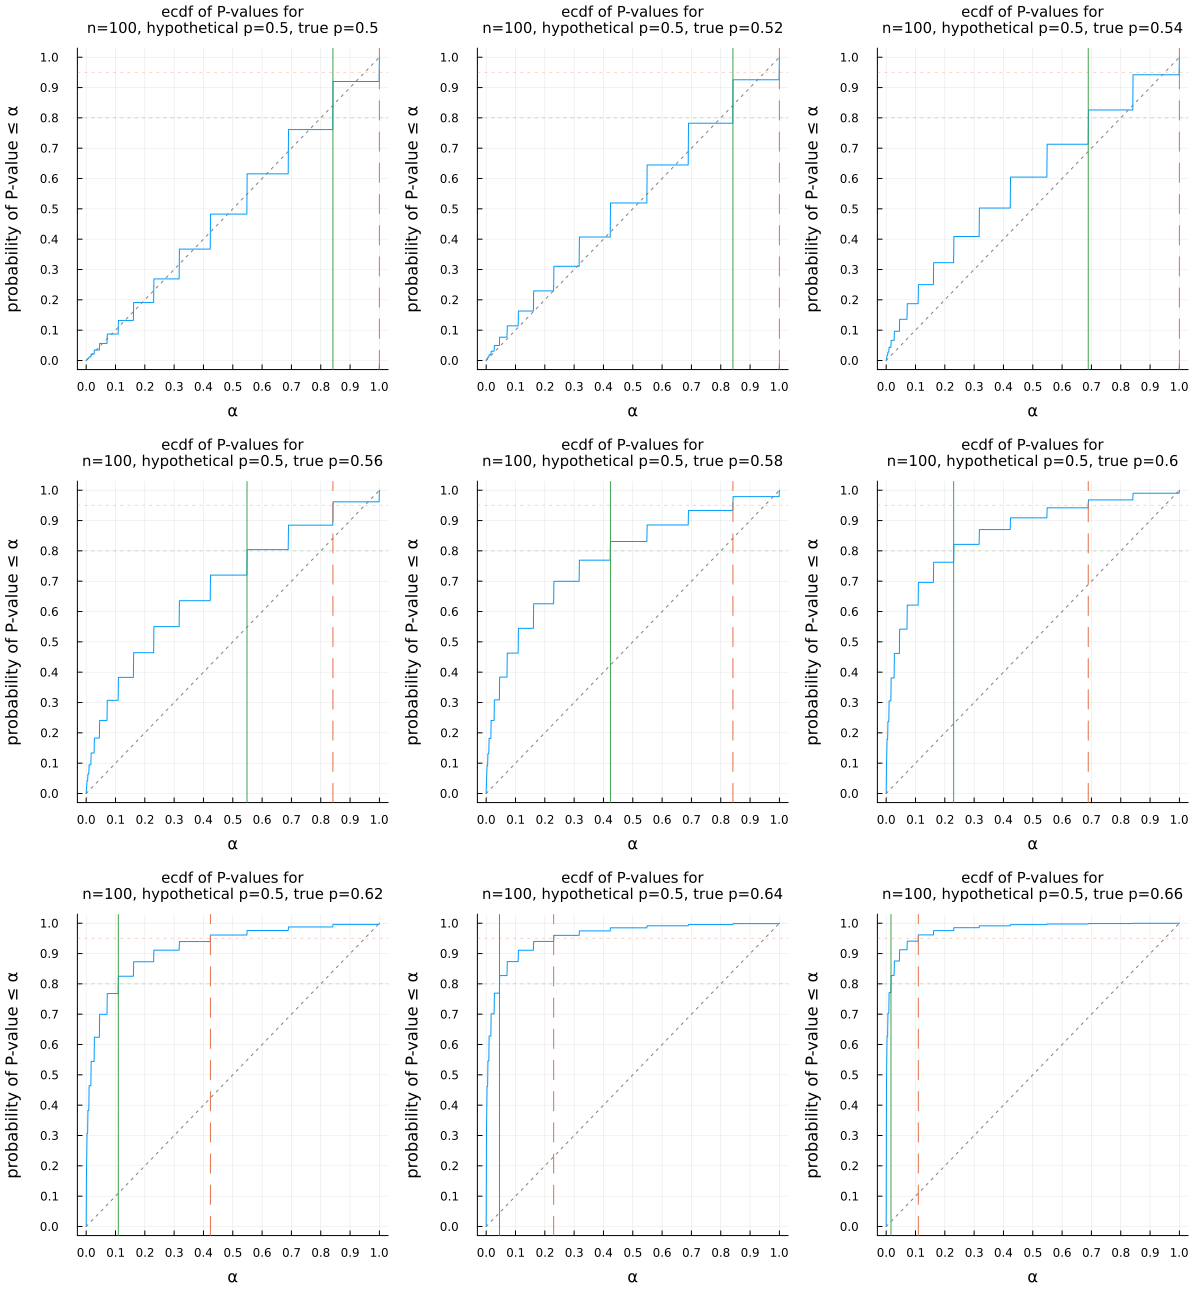

In [1]:
using Distributions
using StatsPlots
default(fmt=:png)

myecdf(A, x) = count(≤(x), A)/length(A)
safediv(x, y) = x == 0 ? zero(x/y) : x/y

function pvalue_wilson(k, n, p)
    z = safediv(k - n*p, √(n*p*(1-p)))
    min(1, 2ccdf(Normal(), abs(z)))
end

function plot_ecdf_pvals(n, p, p₀=0.5; L=10^5)
    bin = Binomial(n, p₀)
    pval = zeros(L)
    for i in 1:L
        k = rand(bin)
        pval[i] = pvalue_wilson(k, n, p)
    end
    xs = range(0, 1, 1001)
    plot(xs, x -> myecdf(pval, x); label="")
    plot!(xs, identity; label="", c=:grey, ls=:dot)
    hline!([0.95]; label="", c=2, alpha=0.3, ls=:dot)
    vline!([quantile(pval, 0.95)]; label="", c=2, ls=:dash)
    hline!([0.80]; label="", c=3, alpha=0.3, ls=:dot)
    vline!([quantile(pval, 0.80)]; label="", c=3)
    plot!(xtick=0:0.1:1, ytick=0:0.1:1)
    plot!(xguide="α", yguide="probability of P-value ≤ α")
    plot!(size=(400, 400))
    title!("ecdf of P-values for\nn=$n, hypothetical p=$p, true p=$p₀",
        titlefontsize=10)
end

PP = []
p = 0.5
for n in (100,), p₀ in 0.50:0.02:0.66
    P = plot_ecdf_pvals(n, p, p₀)
    push!(PP, P)
end
plot(PP...; size=(1200, 1300), layout=(3, 3))
plot!(leftmargin=4Plots.mm)

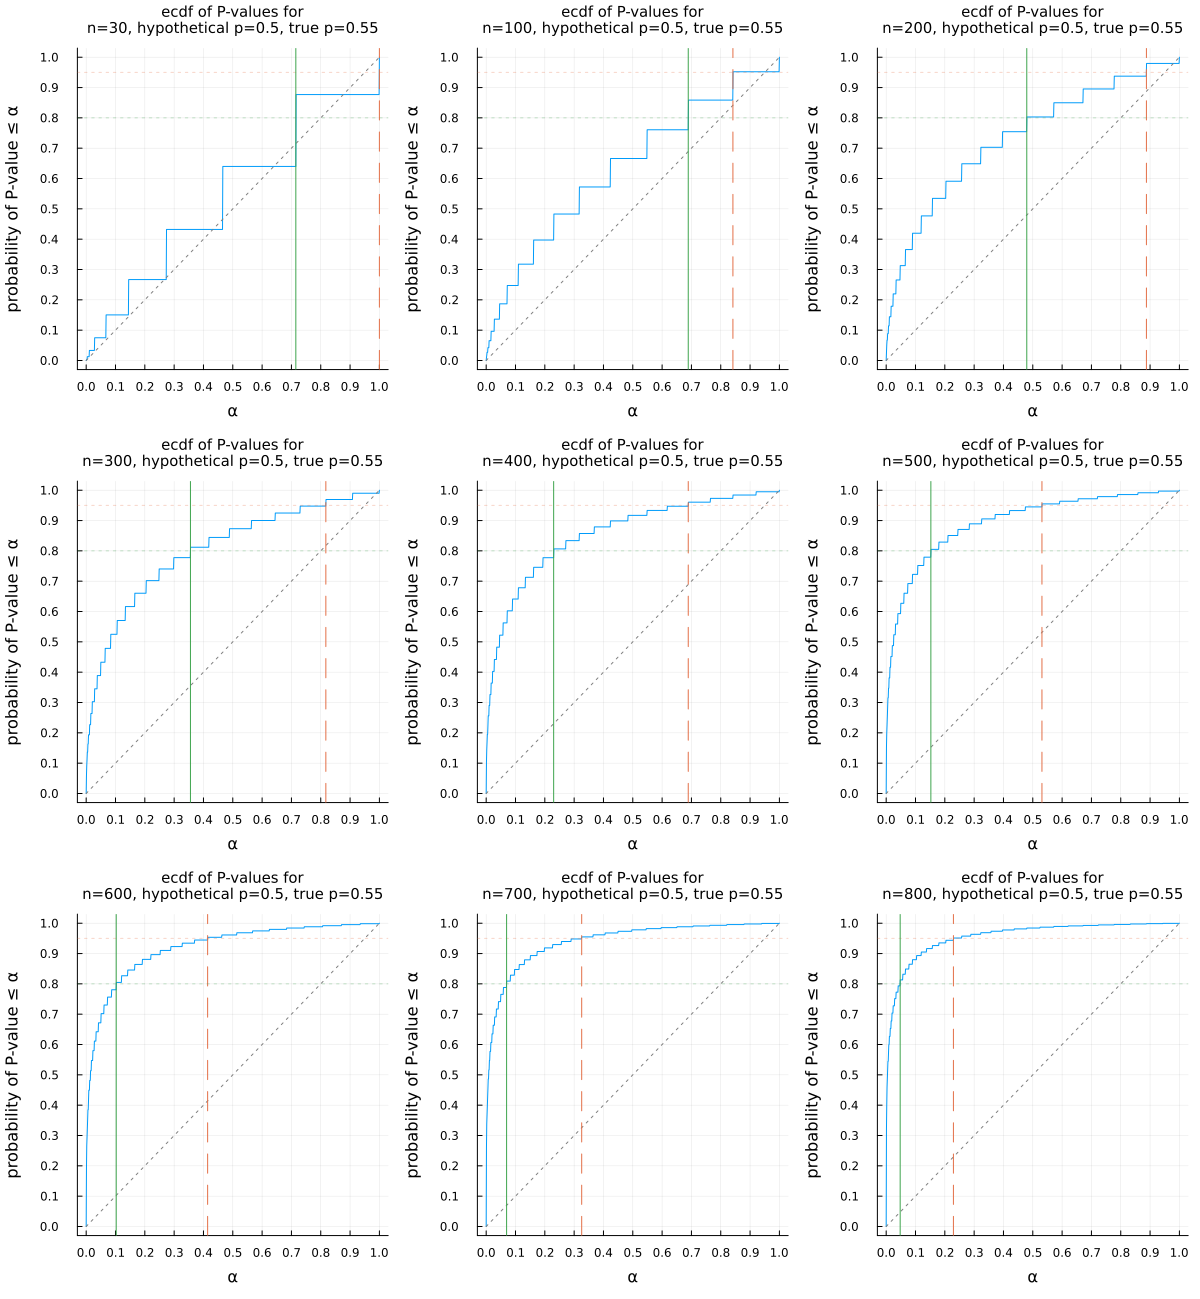

In [2]:
PP = []
p = 0.5
p₀ = 0.55
for n in [30; 100:100:800]
    P = plot_ecdf_pvals(n, p, p₀)
    push!(PP, P)
end
plot(PP...; size=(1200, 1300), layout=(3, 3))
plot!(leftmargin=4Plots.mm)

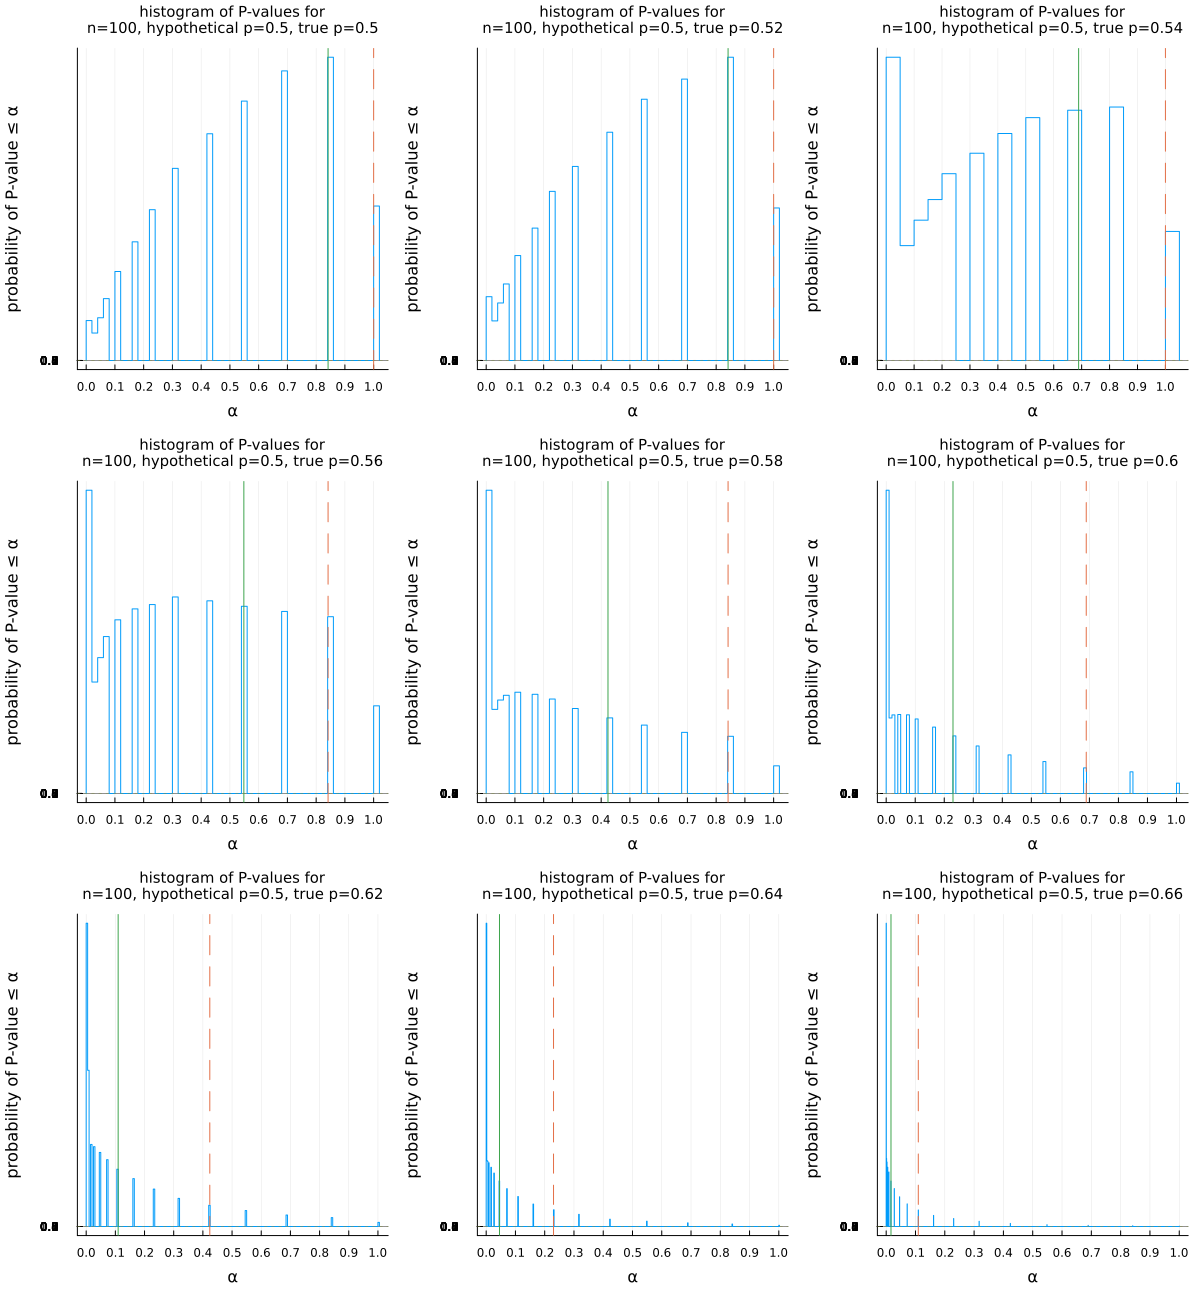

In [3]:
using Distributions
using StatsPlots
default(fmt=:png)

myecdf(A, x) = count(≤(x), A)/length(A)
safediv(x, y) = x == 0 ? zero(x/y) : x/y

function pvalue_wilson(k, n, p)
    z = safediv(k - n*p, √(n*p*(1-p)))
    min(1, 2ccdf(Normal(), abs(z)))
end

function hist_ecdf_pvals(n, p, p₀=0.5; L=10^5)
    bin = Binomial(n, p₀)
    pval = zeros(L)
    for i in 1:L
        k = rand(bin)
        pval[i] = pvalue_wilson(k, n, p)
    end
    xs = range(0, 1, 1001)
    stephist(pval; label="")
    hline!([0.95]; label="", c=2, alpha=0.3, ls=:dot)
    vline!([quantile(pval, 0.95)]; label="", c=2, ls=:dash)
    hline!([0.80]; label="", c=3, alpha=0.3, ls=:dot)
    vline!([quantile(pval, 0.80)]; label="", c=3)
    plot!(xtick=0:0.1:1, ytick=0:0.1:1)
    plot!(xguide="α", yguide="probability of P-value ≤ α")
    plot!(size=(400, 400))
    title!("histogram of P-values for\nn=$n, hypothetical p=$p, true p=$p₀",
        titlefontsize=10)
end

PP = []
p = 0.5
for n in (100,), p₀ in 0.50:0.02:0.66
    P = hist_ecdf_pvals(n, p, p₀)
    push!(PP, P)
end
plot(PP...; size=(1200, 1300), layout=(3, 3))
plot!(leftmargin=4Plots.mm)

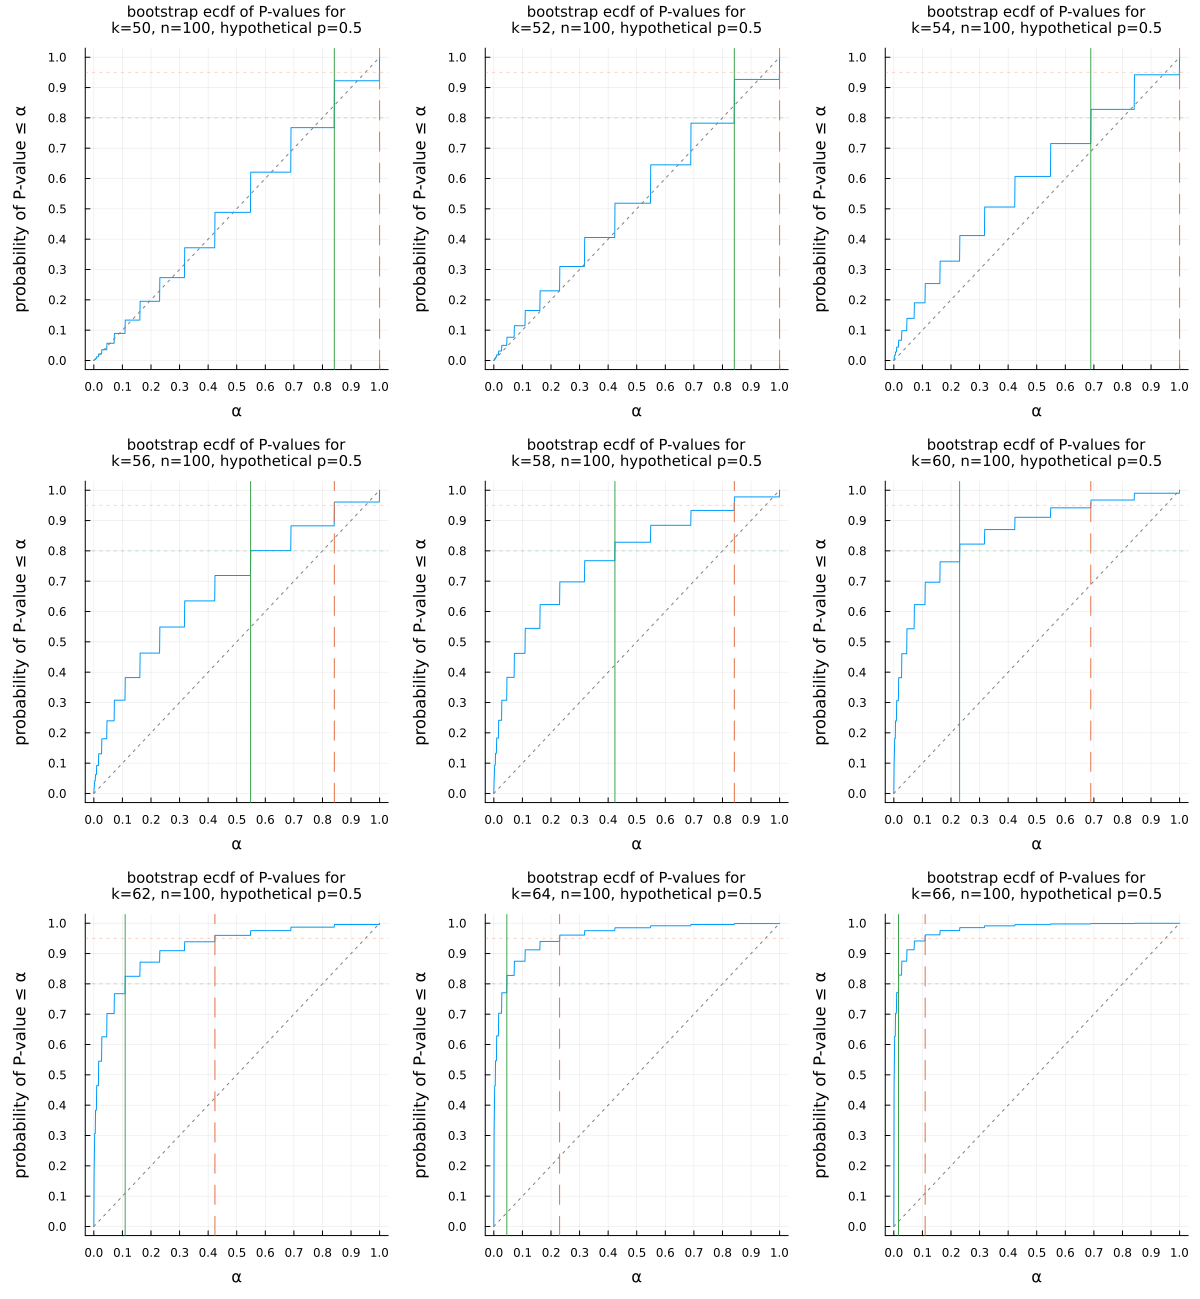

In [4]:
function plot_ecdf_pvals_bootstrap(k, n, p; L=10^5)
    bin = Binomial(n, k/n)
    pval = zeros(L)
    for i in 1:L
        x = rand(bin)
        pval[i] = pvalue_wilson(x, n, p)
    end
    xs = range(0, 1, 1001)
    plot(xs, x -> myecdf(pval, x); label="")
    plot!(xs, identity; label="", c=:grey, ls=:dot)
    hline!([0.95]; label="", c=2, alpha=0.3, ls=:dot)
    vline!([quantile(pval, 0.95)]; label="", c=2, ls=:dash)
    hline!([0.80]; label="", c=3, alpha=0.3, ls=:dot)
    vline!([quantile(pval, 0.80)]; label="", c=3)
    plot!(xtick=0:0.1:1, ytick=0:0.1:1)
    plot!(xguide="α", yguide="probability of P-value ≤ α")
    plot!(size=(400, 400))
    title!("bootstrap ecdf of P-values for\nk=$k, n=$n, hypothetical p=$p",
        titlefontsize=10)
end

n = 100
QQ = []
for k in 50:2:66
    Q = plot_ecdf_pvals_bootstrap(k, n, p)
    push!(QQ, Q)
end
plot(QQ...; size=(1200, 1300), layout=(3, 3))
plot!(leftmargin=6Plots.mm)

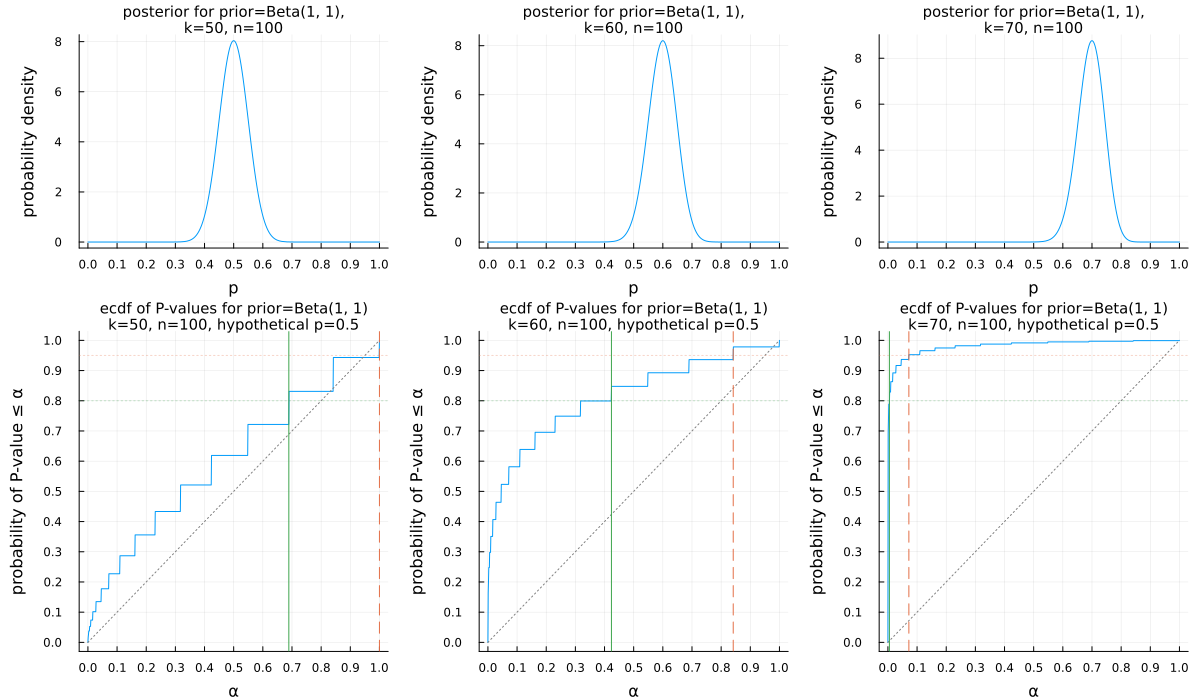

In [5]:
function plot_posterior(k, n; L=10^5, prior=(1, 1))
    a, b = prior
    posterior = Beta(k+a, n-k+b)
    plot(posterior; label="")
    plot!(xtick=0:0.1:1)
    plot!(xguide="p", yguide="probability density")
    title!("posterior for prior=Beta$prior,\nk=$k, n=$n",
        titlefontsize=10)
end

function plot_ecdf_pvals_posterior(k, n, p; L=10^5, prior=(1, 1))
    a, b = prior
    predictive = BetaBinomial(n, k+a, n-k+b)
    pval = zeros(L)
    for i in 1:L
        x = rand(predictive)
        pval[i] = pvalue_wilson(x, n, p)
    end
    xs = range(0, 1, 1001)
    plot(xs, x -> myecdf(pval, x); label="")
    plot!(xs, identity; label="", c=:grey, ls=:dot)
    hline!([0.95]; label="", c=2, alpha=0.3, ls=:dot)
    vline!([quantile(pval, 0.95)]; label="", c=2, ls=:dash)
    hline!([0.80]; label="", c=3, alpha=0.3, ls=:dot)
    vline!([quantile(pval, 0.80)]; label="", c=3)
    plot!(xtick=0:0.1:1, ytick=0:0.1:1)
    plot!(xguide="α", yguide="probability of P-value ≤ α")
    plot!(size=(400, 400))
    title!("ecdf of P-values for prior=Beta$prior\nk=$k, n=$n, hypothetical p=$p",
        titlefontsize=10)
end

n = 100
prior = (1, 1)
PP = []
QQ = []
for k in (50, 60, 70)
    P = plot_posterior(k, n; prior)
    push!(PP, P)
    Q = plot_ecdf_pvals_posterior(k, n, p; prior)
    push!(QQ, Q)
end
plot(PP..., QQ...; size=(1200, 700), layout=@layout [a{0.4h} b c; d e f])
plot!(leftmargin=6Plots.mm, bottommargin=2Plots.mm)

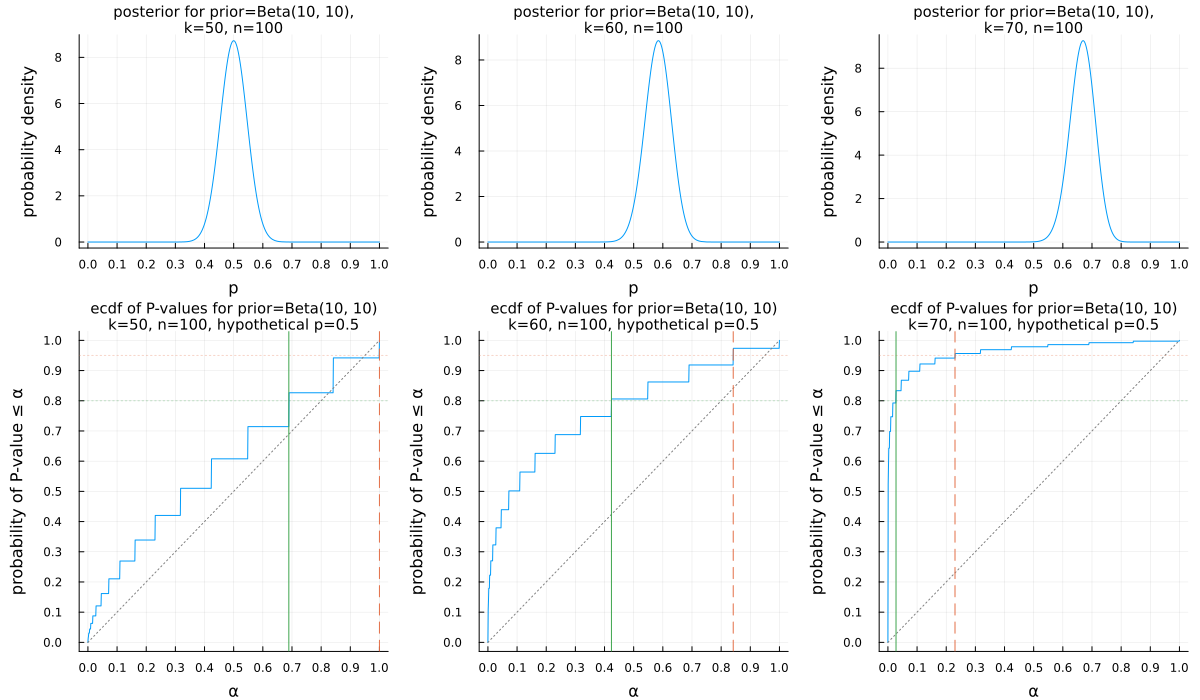

In [6]:
n = 100
prior = (10, 10)
PP = []
QQ = []
for k in (50, 60, 70)
    P = plot_posterior(k, n; prior)
    push!(PP, P)
    Q = plot_ecdf_pvals_posterior(k, n, p; prior)
    push!(QQ, Q)
end
plot(PP..., QQ...; size=(1200, 700), layout=@layout [a{0.4h} b c; d e f])
plot!(leftmargin=6Plots.mm, bottommargin=2Plots.mm)

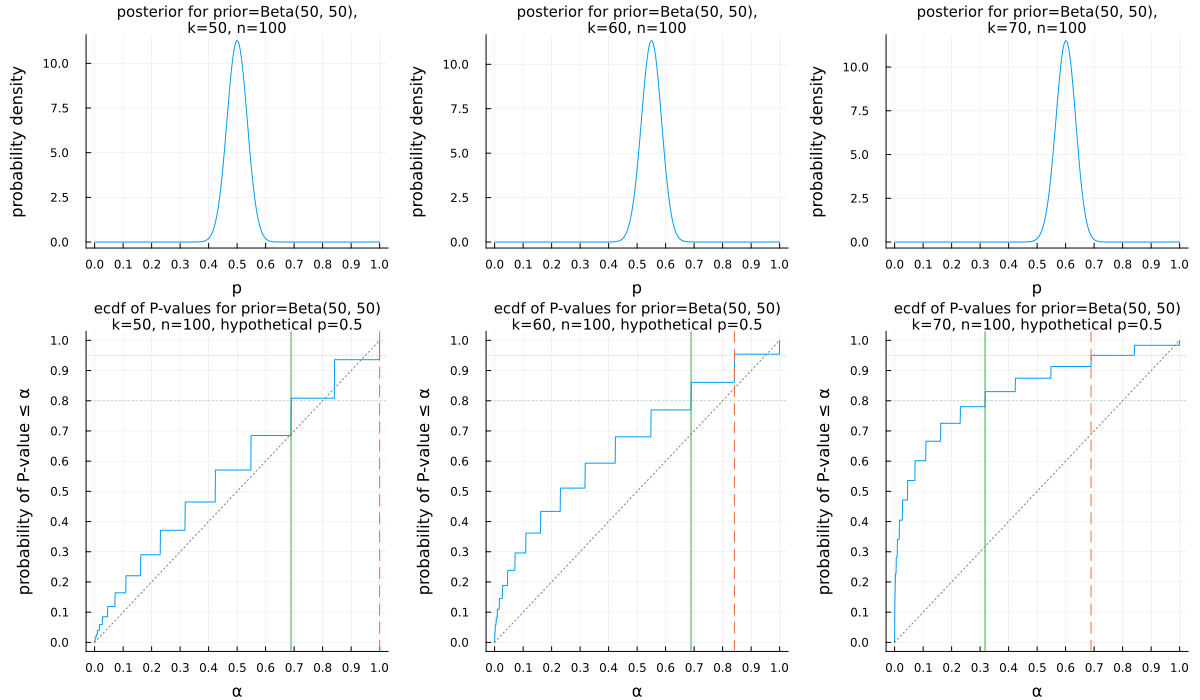

In [7]:
n = 100
prior = (50, 50)
PP = []
QQ = []
for k in (50, 60, 70)
    P = plot_posterior(k, n; prior)
    push!(PP, P)
    Q = plot_ecdf_pvals_posterior(k, n, p; prior)
    push!(QQ, Q)
end
plot(PP..., QQ...; size=(1200, 700), layout=@layout [a{0.4h} b c; d e f])
plot!(leftmargin=6Plots.mm, bottommargin=2Plots.mm)

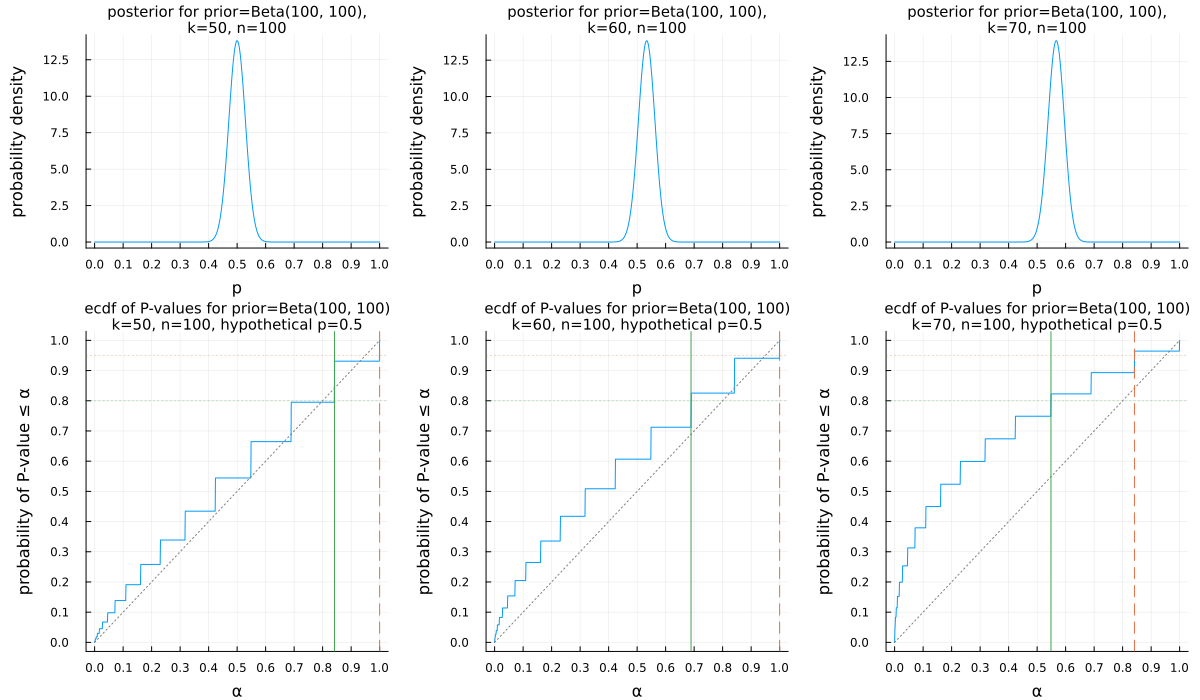

In [8]:
prior = (100, 100)
n = 100
PP = []
QQ = []
for k in (50, 60, 70)
    P = plot_posterior(k, n; prior)
    push!(PP, P)
    Q = plot_ecdf_pvals_posterior(k, n, p; prior)
    push!(QQ, Q)
end
plot(PP..., QQ...; size=(1200, 700), layout=@layout [a{0.4h} b c; d e f])
plot!(leftmargin=6Plots.mm, bottommargin=2Plots.mm)

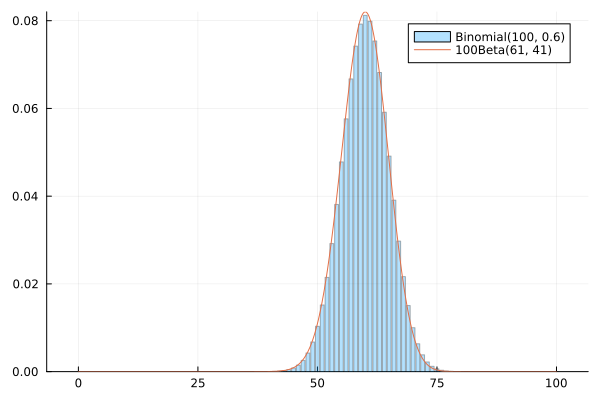

In [9]:
bar(Binomial(100, 0.6); label="Binomial(100, 0.6)", alpha=0.3)
plot!(100Beta(61, 41); label="100Beta(61, 41)")